# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""
Load data from excel file
"""
df = pd.read_excel('../data/01_raw/BMW sales data (2020-2024).xlsx')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994
1,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047
2,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080
3,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949
4,7 Series,2020,North America,Silver,Diesel,Automatic,3.8,27403,100015,8111


Most of the feature names seem self explanatory. However, "Mileage" is given with units "KM". Traditionally, "Mileage" refers to how far a car can travel per unit of fuel. It is unclear if this feature represents "total distance travelled on a full tank" or "distance travelled per unit of fuel". Given the opportunity, I would approach the provider of the data to clarify the correct interpretation of this feature.

## <span style='color:yellow'>*for the purpose of completing this EDA and case study, I will assume that the "Mileage_KM" feature refers to "total distance travelled with a full tank in km"</span>

In [3]:
"""
Stakeholders would likely be interested to know the total revenue generated by each car. Create a new column "Revenue_USD" 
"""
df["Revenue_USD"] = df["Price_USD"] * df["Sales_Volume"]
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD
0,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,792175410
1,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,246749637
2,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,153685840
3,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,437703736
4,7 Series,2020,North America,Silver,Diesel,Automatic,3.8,27403,100015,8111,811221665


In [4]:
"""
Customers might be interested to know the fuel efficiency of the car. Create a new column "Fuel_Efficiency_KMperL"
"""
df["Fuel_Efficiency_KMperL"] = (df["Mileage_KM"] / df["Engine_Size_L"]).astype(int)
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD,Fuel_Efficiency_KMperL
0,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,792175410,2442
1,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,246749637,16032
2,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,153685840,58157
3,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,437703736,109300
4,7 Series,2020,North America,Silver,Diesel,Automatic,3.8,27403,100015,8111,811221665,7211


In [5]:
"""
Quick Summaries
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16701 entries, 0 to 16700
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Model                   16701 non-null  object 
 1   Year                    16701 non-null  int64  
 2   Region                  16701 non-null  object 
 3   Color                   16701 non-null  object 
 4   Fuel_Type               16701 non-null  object 
 5   Transmission            16701 non-null  object 
 6   Engine_Size_L           16701 non-null  float64
 7   Mileage_KM              16701 non-null  int64  
 8   Price_USD               16701 non-null  int64  
 9   Sales_Volume            16701 non-null  int64  
 10  Revenue_USD             16701 non-null  int64  
 11  Fuel_Efficiency_KMperL  16701 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 1.5+ MB


The data appears to be complete

In [6]:
df.dtypes

Model                      object
Year                        int64
Region                     object
Color                      object
Fuel_Type                  object
Transmission               object
Engine_Size_L             float64
Mileage_KM                  int64
Price_USD                   int64
Sales_Volume                int64
Revenue_USD                 int64
Fuel_Efficiency_KMperL      int64
dtype: object

In [7]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD,Fuel_Efficiency_KMperL
count,16701.000000,16701.000000,16701.000000,16701.000000,16701.000000,1.670100e+04,16701.000000
mean,2022.017424,3.251081,100792.785642,75127.690378,5084.304114,3.820426e+08,34664.035447
std,1.408144,1.003780,57924.005086,25898.632364,2861.989970,2.622738e+08,24496.096341
min,2020.000000,1.500000,43.000000,30001.000000,100.000000,3.410472e+06,14.000000
25%,2021.000000,2.400000,50705.000000,52597.000000,2601.000000,1.713786e+08,15739.000000
50%,2022.000000,3.300000,100480.000000,75541.000000,5098.000000,3.353769e+08,30990.000000
75%,2023.000000,4.100000,151555.000000,97297.000000,7562.000000,5.506188e+08,47480.000000
max,2024.000000,5.000000,199991.000000,119997.000000,9999.000000,1.189951e+09,133272.000000


Based on the min and max of Revenue_USD, the revenue of a specific car sold in a specific year could vary as much as 300x

In [8]:
df.nunique()

Model                        11
Year                          5
Region                        6
Color                         6
Fuel_Type                     4
Transmission                  2
Engine_Size_L                36
Mileage_KM                16013
Price_USD                 15211
Sales_Volume               8071
Revenue_USD               16700
Fuel_Efficiency_KMperL    14942
dtype: int64

Interestingly, there are more unique engine sizes than there are car models. I cannot assume that cars of the same model have the same engine size. The price of cars also seems to vary a lot. It might be a case of car prices increasing every year. To investigate.

In [9]:
"""
Check the values of each categorical feature for erroneous/mislabelled data
*treat year as a categorical variable for now
"""

categorical_var = ["Model","Year","Region","Color","Fuel_Type","Transmission"]

for feature in categorical_var:
    print(df[feature].unique())

['5 Series' 'X3' '7 Series' 'i8' 'X5' 'M5' 'X1' 'M3' 'i3' 'X6' '3 Series']
[2022 2024 2020 2021 2023]
['North America' 'Middle East' 'South America' 'Europe' 'Africa' 'Asia']
['Blue' 'Black' 'White' 'Silver' 'Red' 'Grey']
['Petrol' 'Diesel' 'Electric' 'Hybrid']
['Automatic' 'Manual']


The data does not appear to contain erroneous/mislabelled values

In [10]:
"""
Data is not sorted. Sort by Year, then the rest of the categorical data for better look at the data
"""
df_sorted = df.sort_values(by=["Year","Region","Model","Color","Fuel_Type","Transmission","Engine_Size_L"], ignore_index=True)
df_sorted

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD,Fuel_Efficiency_KMperL
0,3 Series,2020,Africa,Black,Diesel,Automatic,2.9,54293,100920,8279,835516680,18721
1,3 Series,2020,Africa,Black,Diesel,Manual,4.6,107799,75078,3975,298435050,23434
2,3 Series,2020,Africa,Black,Electric,Automatic,2.0,60838,66518,8689,577974902,30419
3,3 Series,2020,Africa,Black,Electric,Automatic,4.0,47000,77920,2685,209215200,11750
4,3 Series,2020,Africa,Black,Hybrid,Manual,3.1,47258,110642,3520,389459840,15244
...,...,...,...,...,...,...,...,...,...,...,...,...
16696,i8,2024,South America,White,Hybrid,Automatic,2.0,158202,100376,7203,723008328,79101
16697,i8,2024,South America,White,Hybrid,Manual,2.0,46167,89122,942,83952924,23083
16698,i8,2024,South America,White,Hybrid,Manual,3.4,70808,68686,1422,97671492,20825
16699,i8,2024,South America,White,Hybrid,Manual,4.6,166287,103200,3327,343346400,36149


Data does not look realistic. From the head of the sorted dataframe alone, a "3 Series" sold in 2020 can be either Diesel, Electric or Hybrid, Automatic or Manual, 5 possible different engine sizes and all 5 sold at vastly different price. From the tail of the sorted dataframe, white, hybrid, manual "i8"s sold in 2024, in South America can be sold in 3 engine sizes and the mid sized engine is priced cheaper than the small one. It is hard to suspect there is any correlation between the different feature variables but it doesn't hurt to try.

(Assuming target variable is the revenue for now. There might also be value in comparing each car's sales volume with time)

In [11]:
df_sorted.head(20)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD,Fuel_Efficiency_KMperL
0,3 Series,2020,Africa,Black,Diesel,Automatic,2.9,54293,100920,8279,835516680,18721
1,3 Series,2020,Africa,Black,Diesel,Manual,4.6,107799,75078,3975,298435050,23434
2,3 Series,2020,Africa,Black,Electric,Automatic,2.0,60838,66518,8689,577974902,30419
3,3 Series,2020,Africa,Black,Electric,Automatic,4.0,47000,77920,2685,209215200,11750
4,3 Series,2020,Africa,Black,Hybrid,Manual,3.1,47258,110642,3520,389459840,15244
5,3 Series,2020,Africa,Black,Hybrid,Manual,4.9,8916,85674,1901,162866274,1819
6,3 Series,2020,Africa,Black,Petrol,Automatic,4.6,124131,48749,2085,101641665,26985
7,3 Series,2020,Africa,Black,Petrol,Automatic,4.8,22293,94660,3567,337652220,4644
8,3 Series,2020,Africa,Black,Petrol,Manual,3.5,132464,62621,8064,504975744,37846
9,3 Series,2020,Africa,Blue,Diesel,Automatic,2.5,1863,47334,1697,80325798,745


Compare index 0 and index 9. The cars only differ by color (black vs blue) but the engine size is different. In fact, engine size appears to be a randomly chosen 1 decimal point float between 1.5 and 5.0 if we look at this subset of the dataframe and the results from df.describe() and df.nunique(). 

*There are exactly 36 possible 1 decimal point float values between 1.5 and 5.0 (inclusive).

In [13]:
"""
Using sampling, filter the dataframe to check that each specific car appears each year
"""

df_sample1 = df_sorted[
    (df_sorted["Model"]=="3 Series") \
    &(df_sorted["Region"]=="Africa") \
    &(df_sorted["Color"]=="Black") \
    &(df_sorted["Fuel_Type"]=="Diesel") \
    &(df_sorted["Transmission"]=="Automatic") \
    &(df_sorted["Engine_Size_L"]==2.9) \
        ]
df_sample1

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD,Fuel_Efficiency_KMperL
0,3 Series,2020,Africa,Black,Diesel,Automatic,2.9,54293,100920,8279,835516680,18721


Treat Engine_size_L as a continuous numeric variable.

## Feature Engineering

In [21]:
"""
Aim to reduce number of tokens fed to the llm. Easier to bin the numeric continuous variables to turn them into categories. I would ask the business unit if there was a more meaningful split given the opportunity but for now, I'll bin Fuel_Efficiency_KMperL and Price_USD each into 3 equal sized bins.

Fuel_Efficiency_KMperL : ["low", "mid", "high"]
Price_Tier : ["Entry", "Mid-range", "High-end"]
"""

df_sorted["Fuel_Efficiency_Range"] = pd.cut(
    df_sorted["Fuel_Efficiency_KMperL"],
    bins=3,
    labels=["low", "mid", "high"],
)

df_sorted["Price_Tier"] = pd.cut(
    df_sorted["Price_USD"],
    bins=3,
    labels=["Entry", "Mid-range", "High-end"],
)
df_sorted.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD,Fuel_Efficiency_KMperL,Fuel_Efficiency_Range,Price_Tier
0,3 Series,2020,Africa,Black,Diesel,Automatic,2.9,54293,100920,8279,835516680,18721,low,High-end
1,3 Series,2020,Africa,Black,Diesel,Manual,4.6,107799,75078,3975,298435050,23434,low,Mid-range
2,3 Series,2020,Africa,Black,Electric,Automatic,2.0,60838,66518,8689,577974902,30419,low,Mid-range
3,3 Series,2020,Africa,Black,Electric,Automatic,4.0,47000,77920,2685,209215200,11750,low,Mid-range
4,3 Series,2020,Africa,Black,Hybrid,Manual,3.1,47258,110642,3520,389459840,15244,low,High-end


In [29]:
"""
Also bin the model series
"""

model_series_map ={
    "Number Series": ["3 Series", "5 Series", "7 Series"],
    "i Series": ["i3", "i8"],
    "M Series": ["M3", "M5"],
    "X Series": ["X1", "X3", "X5", "X6"],
}

model_series_lookup = (
    pd.Series(model_series_map)
    .explode()
    .rename_axis("Model_Series")
    .reset_index(name="Model")
)

df_sorted = df_sorted.merge(model_series_lookup, on="Model", how="left")
df_sorted

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Revenue_USD,Fuel_Efficiency_KMperL,Fuel_Efficiency_Range,Price_Tier,Model_Series
0,3 Series,2020,Africa,Black,Diesel,Automatic,2.9,54293,100920,8279,835516680,18721,low,High-end,Number Series
1,3 Series,2020,Africa,Black,Diesel,Manual,4.6,107799,75078,3975,298435050,23434,low,Mid-range,Number Series
2,3 Series,2020,Africa,Black,Electric,Automatic,2.0,60838,66518,8689,577974902,30419,low,Mid-range,Number Series
3,3 Series,2020,Africa,Black,Electric,Automatic,4.0,47000,77920,2685,209215200,11750,low,Mid-range,Number Series
4,3 Series,2020,Africa,Black,Hybrid,Manual,3.1,47258,110642,3520,389459840,15244,low,High-end,Number Series
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16696,i8,2024,South America,White,Hybrid,Automatic,2.0,158202,100376,7203,723008328,79101,mid,High-end,i Series
16697,i8,2024,South America,White,Hybrid,Manual,2.0,46167,89122,942,83952924,23083,low,Mid-range,i Series
16698,i8,2024,South America,White,Hybrid,Manual,3.4,70808,68686,1422,97671492,20825,low,Mid-range,i Series
16699,i8,2024,South America,White,Hybrid,Manual,4.6,166287,103200,3327,343346400,36149,low,High-end,i Series


## Simple plots

In [26]:
"""
Plot naive simple graphs of each feature against the target variables "Sales_Volume" and "Revenue_USD"
"""
def plot_cat_var(df: pd.DataFrame, feature: str, target: str) -> None:
    '''
    A function that plots a histogram or bar chart from the values of a column in a df 
    depending on data type and number of unique values
    
    Parameters
    ----------
    df : DataFrame
        the dataframe in which the column resides
    col : str
        the name of the column that we need to plot

    Returns
    -------
    No return. The function displays the histogram or barchart
    '''
    # Plot
    plt.figure(figsize=(8, 5))
    df.plot(feature, target, kind="bar")
    plt.xlabel(f"{feature}")
    plt.ylabel(f"{target}")
    plt.title(f"Total Sum of {target} by {feature}")
    plt.xticks(rotation=45)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.show()
    plt.close()

<Figure size 800x500 with 0 Axes>

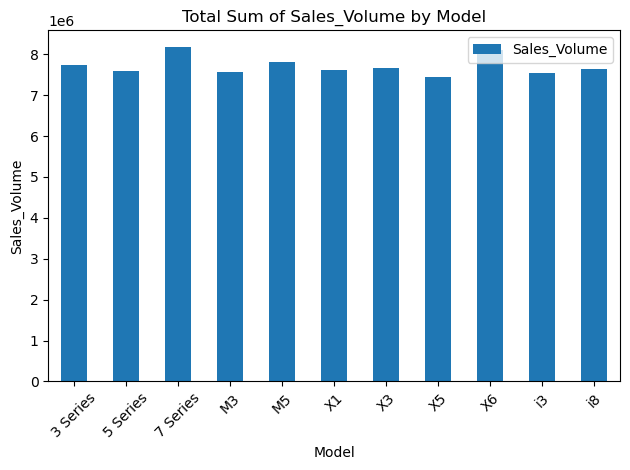

<Figure size 800x500 with 0 Axes>

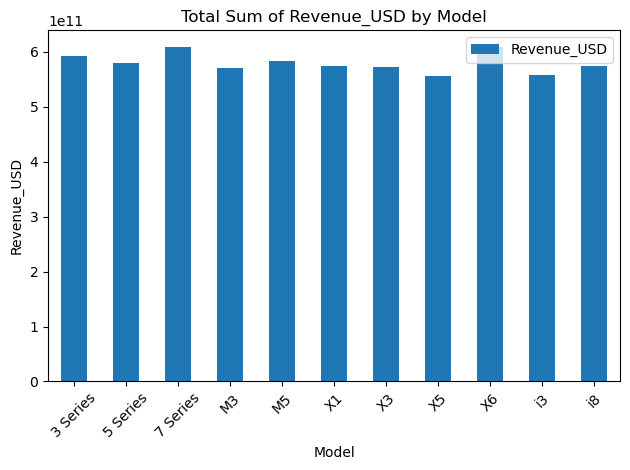

<Figure size 800x500 with 0 Axes>

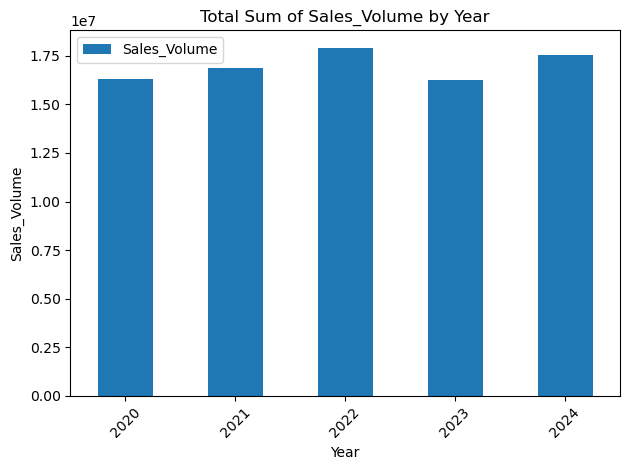

<Figure size 800x500 with 0 Axes>

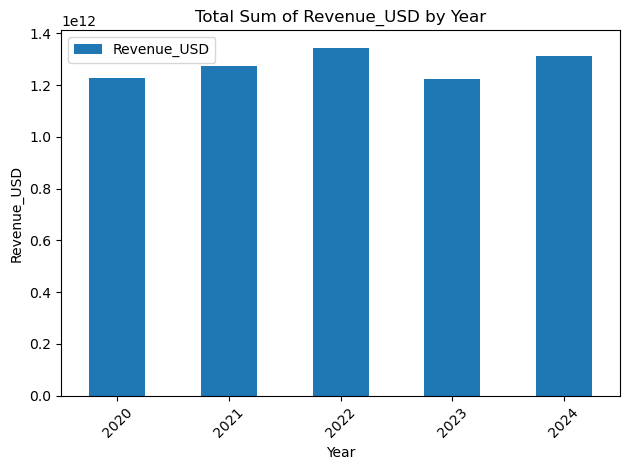

<Figure size 800x500 with 0 Axes>

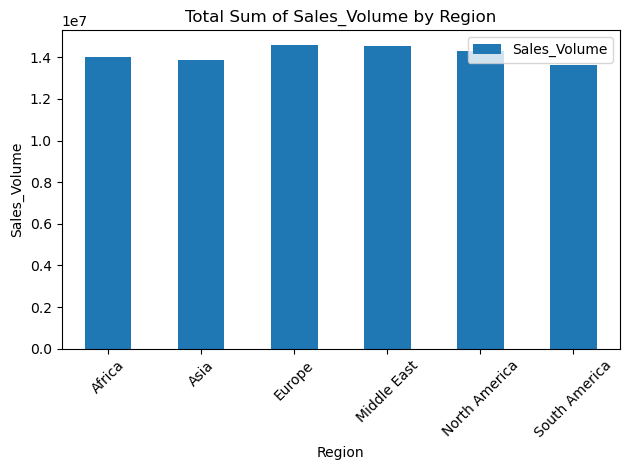

<Figure size 800x500 with 0 Axes>

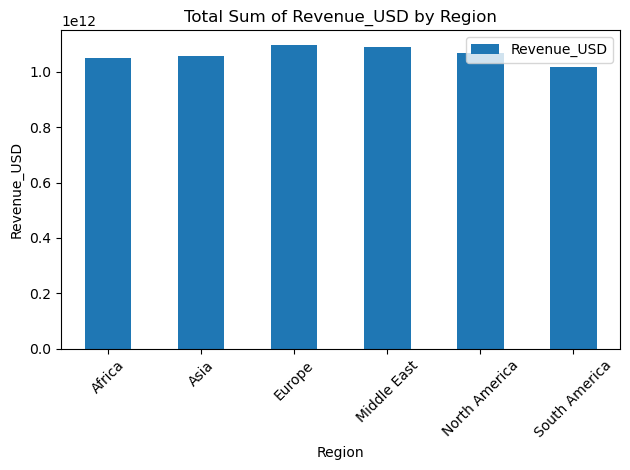

<Figure size 800x500 with 0 Axes>

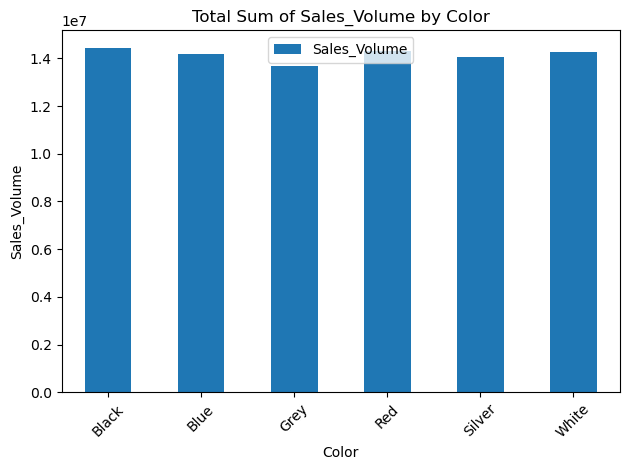

<Figure size 800x500 with 0 Axes>

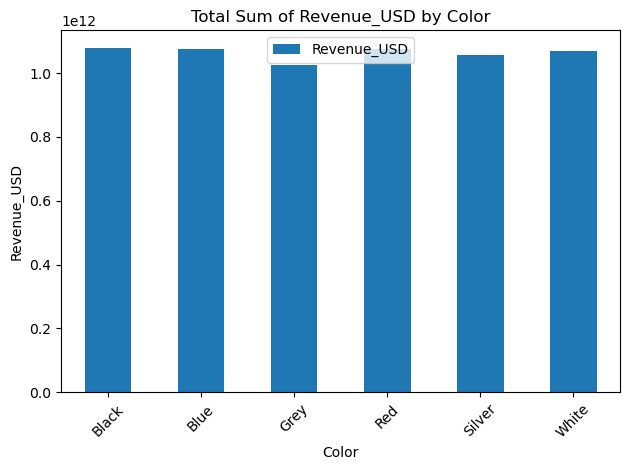

<Figure size 800x500 with 0 Axes>

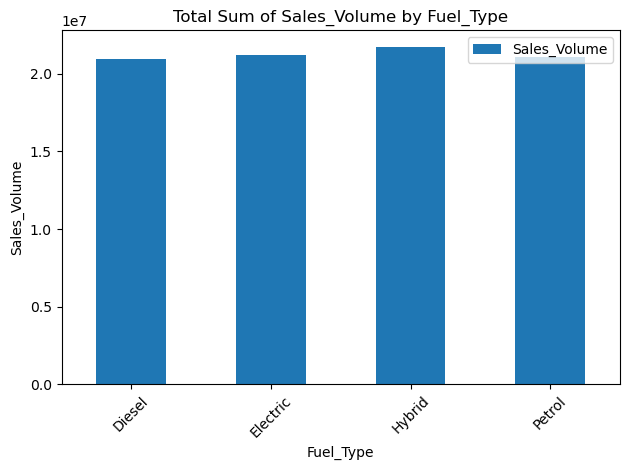

<Figure size 800x500 with 0 Axes>

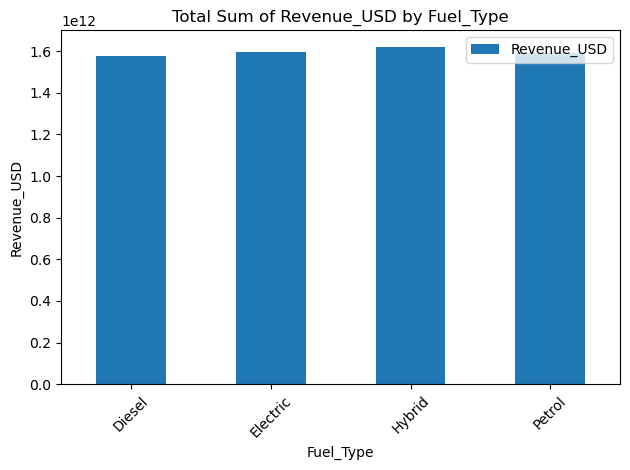

<Figure size 800x500 with 0 Axes>

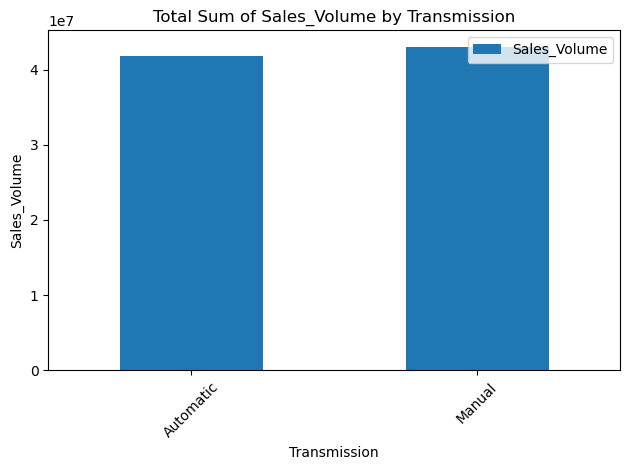

<Figure size 800x500 with 0 Axes>

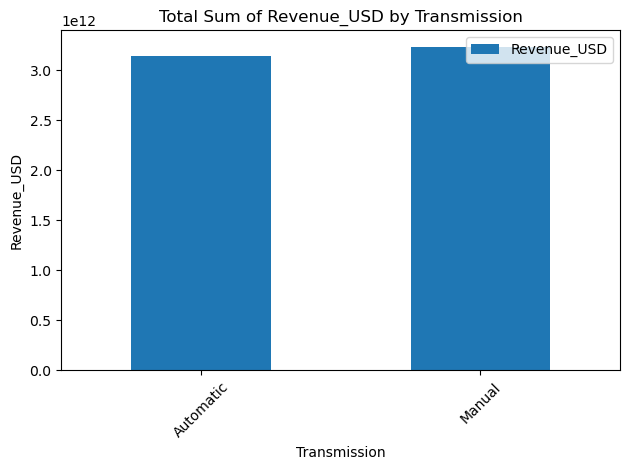

C:\Users\User\AppData\Local\Temp\ipykernel_3360\3355778418.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby(feature)[target].sum().reset_index()


<Figure size 800x500 with 0 Axes>

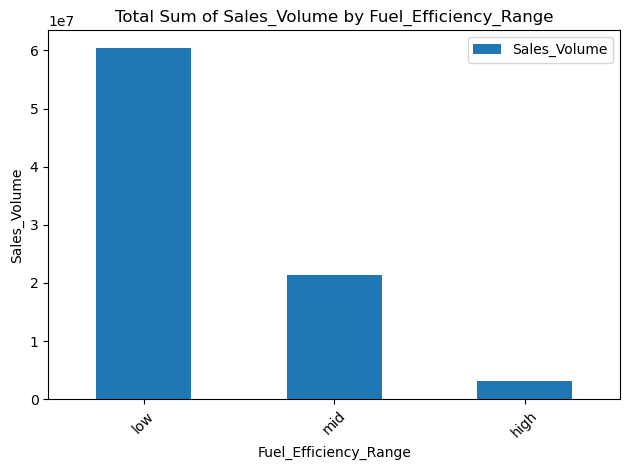

C:\Users\User\AppData\Local\Temp\ipykernel_3360\3355778418.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby(feature)[target].sum().reset_index()


<Figure size 800x500 with 0 Axes>

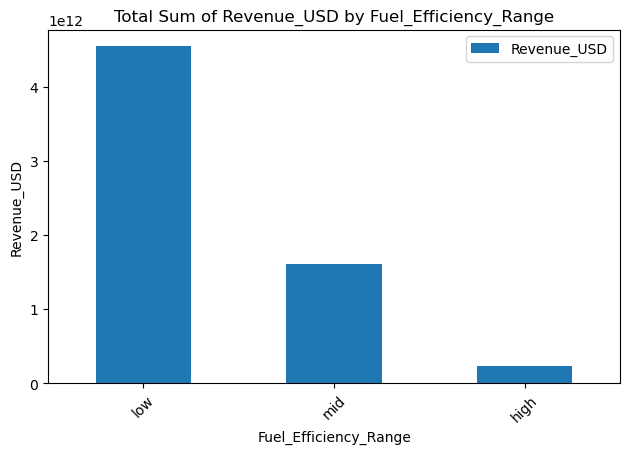

C:\Users\User\AppData\Local\Temp\ipykernel_3360\3355778418.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby(feature)[target].sum().reset_index()


<Figure size 800x500 with 0 Axes>

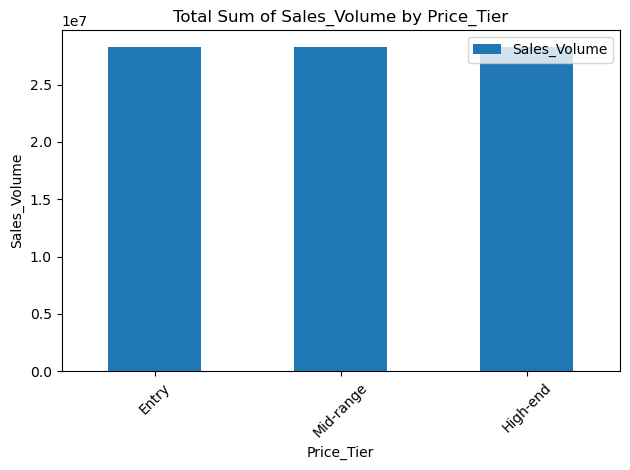

C:\Users\User\AppData\Local\Temp\ipykernel_3360\3355778418.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby(feature)[target].sum().reset_index()


<Figure size 800x500 with 0 Axes>

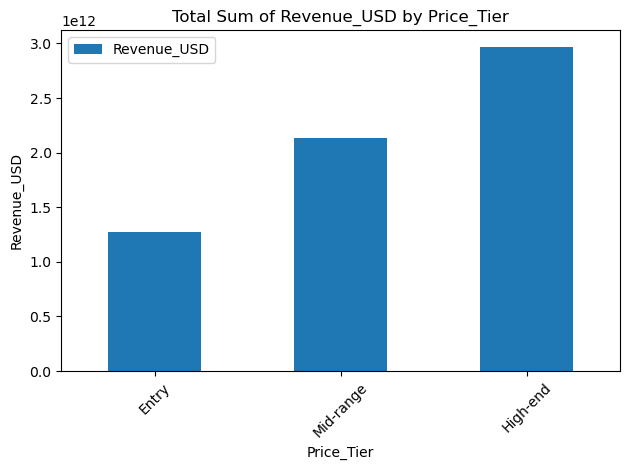

<Figure size 800x500 with 0 Axes>

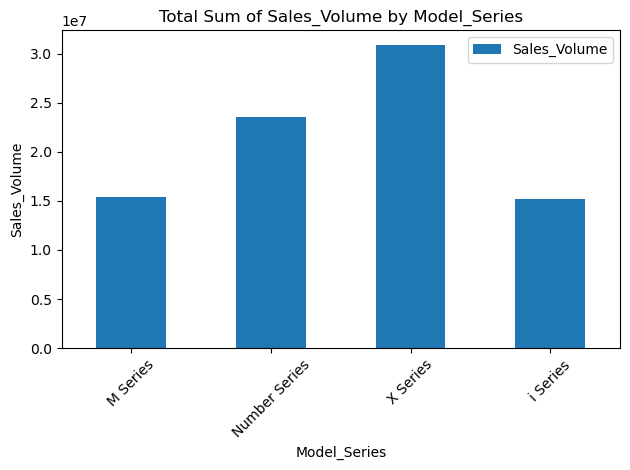

<Figure size 800x500 with 0 Axes>

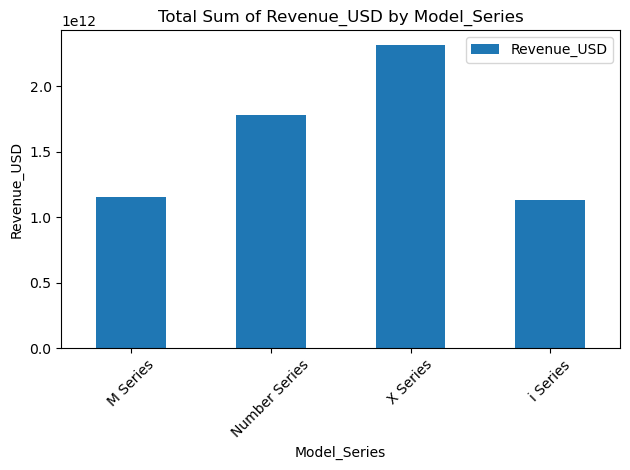

In [30]:
for feature in ["Model","Year","Region","Color","Fuel_Type","Transmission", "Fuel_Efficiency_Range", "Price_Tier", "Model_Series"]:
    for target in ["Sales_Volume", "Revenue_USD"]:
        # Group by the categorical column and sum the target
        df_grouped = df_sorted.groupby(feature)[target].sum().reset_index()
        plot_cat_var(df_grouped, feature, target)

### Observations
- Overall sales generally follows a growing trend though there is a significant dip in 2023
- Regional sales differences (can see which regions did the best but the difference does not look significant. *axis is 10^12 though)
- Cars with low fuel efficiency seem to sell well. Having both high sales volume as well as high revenue generation.
- Cars of the 3 different price tiers seem to sell equally well, but due to the higher price points of the high-end cars, they generate better revenue.
- Cars from the X-series and the Number series sold significantly better than the i and M series cars.